In [25]:
import numpy as np
import pandas as pd
import json
import ast
from collections import OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

In [56]:
sa_df = pd.read_csv("..\data\data_sentiment_analysis.csv")
sa_df.head()

,Unnamed: 0.1,Unnamed: 0,_id,duration,likes,speakers,subtitle_languages,summary,topics,title,transcript,views,recorded_date,published_date,speakers_list,sl_list,topics_list,processed_transcript,tb_score,vd_score
0,0,0,21,992,17000,"[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...","[{'id': '4', 'name': 'culture'}, {'id': '13', ...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,2006-02-23,2006-08-25,['Mena Trott'],"['English', 'Vietnamese', 'Italian', 'Arabic',...","['culture', 'design', 'business', 'entertainme...",past couple day preparing speech become nervou...,0.133855,0.9996
1,1,1,1,957,110000,"[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,2006-02-25,2006-06-27,['Al Gore'],"['Greek', 'Gujarati', 'English', 'Italian', 'S...","['climate change', 'culture', 'environment', '...",thank much chris truly great honor opportunity...,0.131762,0.9997
2,2,2,7,1266,60000,"[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,"[{'id': '10', 'name': 'technology'}, {'id': '3...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,2006-02-24,2006-06-27,['David Pogue'],"['Greek', 'English', 'Vietnamese', 'Italian', ...","['technology', 'computers', 'entertainment', '...",music sound silence simon amp garfunkel hello ...,0.155493,0.9999
3,3,3,47,1126,80000,"[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,2005-07-14,2006-09-12,['David Deutsch'],"['Greek', 'English', 'Vietnamese', 'Italian', ...","['climate change', 'culture', 'environment', '...",told go limb say something surprising try want...,0.066814,0.9990
4,4,4,55,1524,14000,"[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",My wish: A global day of film,I can't help but this wish: to think about whe...,489757,2006-02-26,2006-07-25,['Jehane Noujaim'],"['English', 'Vietnamese', 'Italian', 'Arabic',...","['culture', 'global issues', 'entertainment', ...",help wish think little kid friend ask genie co...,0.127882,0.9995


In [57]:
def json_converter(column):
    try:
        # Remove extra characters and parse JSON
        cleaned_str = column.strip('```json\r\n').strip('\r\n```').strip()
        return json.loads(cleaned_str)
    except (json.JSONDecodeError, AttributeError):
        return {}

In [58]:
df = pd.read_csv(r"..\data\updated_transcripts_with_emotions_final.csv", index_col=0, converters={'detected_emotion': json_converter})
df.head()

,_id,duration,likes,speakers,subtitle_languages,summary,topics,title,transcript,views,recorded_date,published_date,speakers_list,sl_list,topics_list,processed_transcript,detected_emotion
Unnamed: 0,,,,,,,,,,,,,,,,,
0,21,992,17000,"[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...","[{'id': '4', 'name': 'culture'}, {'id': '13', ...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,2006-02-23,2006-08-25,['Mena Trott'],"['English', 'Vietnamese', 'Italian', 'Arabic',...","['culture', 'design', 'business', 'entertainme...",past couple day preparing speech become nervou...,"{'Inspired': 0.9, 'Moved': 0.8, 'Sad': 0.7}"
1,1,957,110000,"[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,2006-02-25,2006-06-27,['Al Gore'],"['Greek', 'Gujarati', 'English', 'Italian', 'S...","['climate change', 'culture', 'environment', '...",thank much chris truly great honor opportunity...,"{'Inspired': 0.85, 'Curious': 0.75, 'Moved': 0.6}"
2,7,1266,60000,"[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,"[{'id': '10', 'name': 'technology'}, {'id': '3...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,2006-02-24,2006-06-27,['David Pogue'],"['Greek', 'English', 'Vietnamese', 'Italian', ...","['technology', 'computers', 'entertainment', '...",music sound silence simon amp garfunkel hello ...,"{'Curious': 0.9, 'Informed': 0.8, 'Impressed':..."
3,47,1126,80000,"[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,2005-07-14,2006-09-12,['David Deutsch'],"['Greek', 'English', 'Vietnamese', 'Italian', ...","['climate change', 'culture', 'environment', '...",told go limb say something surprising try want...,"{'Inspired': 0.9, 'Moved': 0.7, 'Informed': 0.65}"
4,55,1524,14000,"[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",My wish: A global day of film,I can't help but this wish: to think about whe...,489757,2006-02-26,2006-07-25,['Jehane Noujaim'],"['English', 'Vietnamese', 'Italian', 'Arabic',...","['culture', 'global issues', 'entertainment', ...",help wish think little kid friend ask genie co...,"{'Moved': 0.9, 'Inspired': 0.85, 'Curious': 0.75}"


In [59]:
# check type of detected_emotion column
df['detected_emotion'][2]
print(type(df['detected_emotion'][0]))

<class 'dict'>


In [82]:
df['popularity'] = (df['likes']/df['views']) * 100
df['popularity_log'] = np.log(df['popularity'])
# Let's view the dataset again
df['popularity'][0:5]

Unnamed: 0
0    2.885684
1    2.995805
2    2.987323
3    2.969279
4    2.858560
Name: popularity, dtype: float64

In [83]:
df['popularity_log'][0:5]

Unnamed: 0
0    1.059762
1    1.097213
2    1.094378
3    1.088319
4    1.050318
Name: popularity_log, dtype: float64

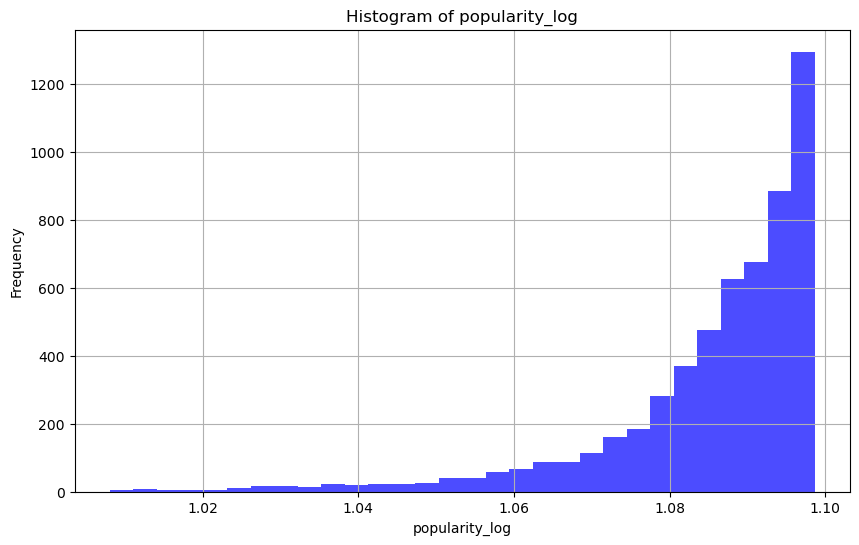

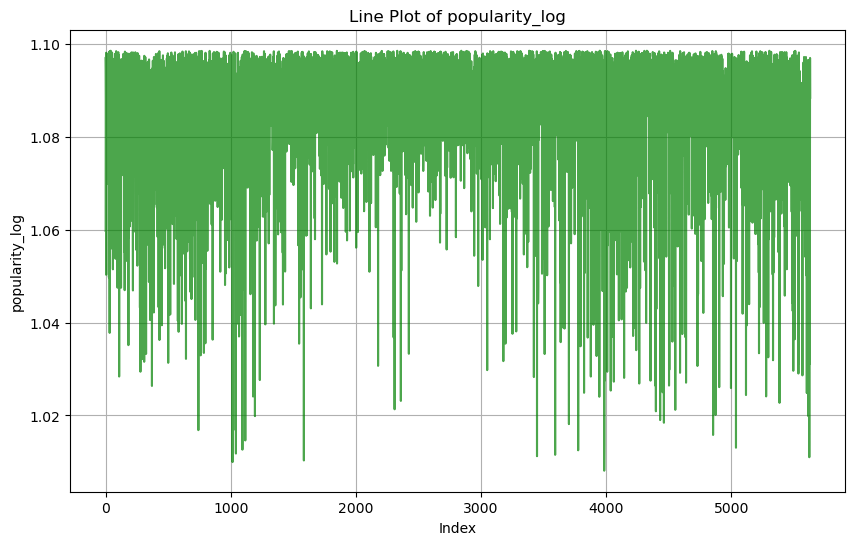

In [84]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['popularity_log'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of popularity_log')
plt.xlabel('popularity_log')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(df['popularity_log'], color='green', alpha=0.7)
plt.title('Line Plot of popularity_log')
plt.xlabel('Index')
plt.ylabel('popularity_log')
plt.grid(True)
plt.show()

In [86]:
# merge with sentiment analysis dataframe to get SA scores
df_merged = df.merge(sa_df[['tb_score', 'vd_score']], left_index=True, right_index=True, how='left')
df_merged.head()

,_id,duration,likes,speakers,subtitle_languages,summary,topics,title,transcript,views,...,Fairness,Inform​ed,Informal,Joyful,Compassion,Informed,Informative,popularity_log,tb_score,vd_score
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,21,992,17000,"[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...","[{'id': '4', 'name': 'culture'}, {'id': '13', ...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.059762,0.133855,0.9996
1,1,957,110000,"[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.097213,0.131762,0.9997
2,7,1266,60000,"[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,"[{'id': '10', 'name': 'technology'}, {'id': '3...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,...,0.0,0.0,0.0,0.0,0.0,0.80,0.0,1.094378,0.155493,0.9999
3,47,1126,80000,"[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,...,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.088319,0.066814,0.9990
4,55,1524,14000,"[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",My wish: A global day of film,I can't help but this wish: to think about whe...,489757,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.050318,0.127882,0.9995


In [87]:
# Extract unique emotion keys
unique_emotions = set()
for emotions in df['detected_emotion']:
    unique_emotions.update(emotions.keys())

# Create new columns for each unique emotion with initial values set to 0
for emotion in unique_emotions:
    df[emotion] = 0.0

# Iterate over the rows and update the values in the new columns
for index, row in df.iterrows():
    emotions = row['detected_emotion']
    for emotion, score in emotions.items():
        df.at[index, emotion] = score

# Display the updated DataFrame
df.head()

,_id,duration,likes,speakers,subtitle_languages,summary,topics,title,transcript,views,...,Amused,Impressed,Fairness,Inform​ed,Informal,Joyful,Compassion,Informed,Informative,popularity_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,21,992,17000,"[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...","[{'id': '4', 'name': 'culture'}, {'id': '13', ...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.059762
1,1,957,110000,"[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.097213
2,7,1266,60000,"[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,"[{'id': '10', 'name': 'technology'}, {'id': '3...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,...,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.80,0.0,1.094378
3,47,1126,80000,"[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.088319
4,55,1524,14000,"[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",My wish: A global day of film,I can't help but this wish: to think about whe...,489757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.050318


In [88]:
print(unique_emotions)

{'Empathy', 'Concerned', 'Hopedul', 'Cooperation', 'Informend', 'Informe', 'InformEd', 'Informned', 'Unity', 'Educated', 'Surprised', 'Moved', 'Inform', 'Motivated', 'Information', 'Hopeful', 'Fulfilled', 'Sad', 'Understanding', 'Empowered', 'Curious', 'Inspired', 'Amused', 'Impressed', 'Fairness', 'Inform\u200bed', 'Informal', 'Joyful', 'Compassion', 'Informed', 'Informative'}


In [89]:
df_merged.columns.tolist()

['_id',
 'duration',
 'likes',
 'speakers',
 'subtitle_languages',
 'summary',
 'topics',
 'title',
 'transcript',
 'views',
 'recorded_date',
 'published_date',
 'speakers_list',
 'sl_list',
 'topics_list',
 'processed_transcript',
 'detected_emotion',
 'popularity',
 'Empathy',
 'Concerned',
 'Hopedul',
 'Cooperation',
 'Informend',
 'Informe',
 'InformEd',
 'Informned',
 'Unity',
 'Educated',
 'Surprised',
 'Moved',
 'Inform',
 'Motivated',
 'Information',
 'Hopeful',
 'Fulfilled',
 'Sad',
 'Understanding',
 'Empowered',
 'Curious',
 'Inspired',
 'Amused',
 'Impressed',
 'Fairness',
 'Inform\u200bed',
 'Informal',
 'Joyful',
 'Compassion',
 'Informed',
 'Informative',
 'popularity_log',
 'tb_score',
 'vd_score']

In [91]:
X = df_merged.drop(['_id', 'likes', 'published_date', 'recorded_date', 'speakers', 'subtitle_languages', 'summary', 'title', 'topics', 'transcript','views', 'speakers_list','sl_list','topics_list', 'processed_transcript', 'detected_emotion', 'popularity'], axis=1)
#[['duration', 'tb_score', 'vd_score', 'topics_list']]
y = df_merged['popularity_log']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

1.0

In [95]:
y_pred_linear = reg.predict(X_test_scaled)
mse_linear = np.mean((y_pred_linear - y_test) ** 2)
mse_linear

1.7499132768877814e-34

In [96]:
print(y_pred_linear)

[1.09785438 1.06719976 1.09828287 ... 1.08343431 1.08942462 1.08656331]


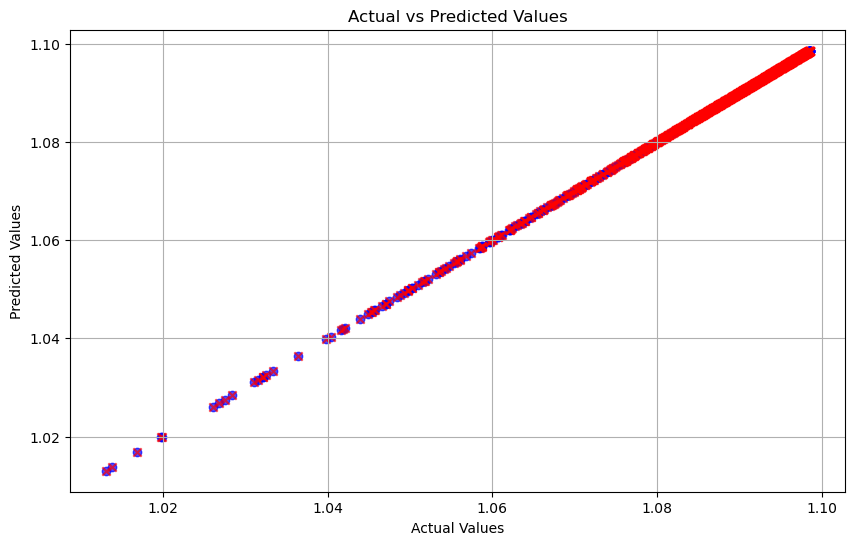

In [104]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_linear  # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

